## Problem Statement
Analyze Instagram post data to understand what drives reach,
engagement, and follower growth.

## Key Insights
- Home feed contributes the highest impressions
- Posts with higher saves tend to generate more follows
- Engagement rate is more meaningful than impressions alone


### Tools Used
- Python
- Pandas
- Matplotlib
- Seaborn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(
    "/kaggle/input/my-datasat/Instagram data.csv",
    encoding="latin1"
)

df.head()


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [3]:
print("Shape:", df.shape)
df.info()
df.describe()


Shape: (119, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [4]:
df["Engagement"] = df["Likes"] + df["Comments"] + df["Shares"] + df["Saves"]
df["Engagement_Rate"] = df["Engagement"] / df["Impressions"]


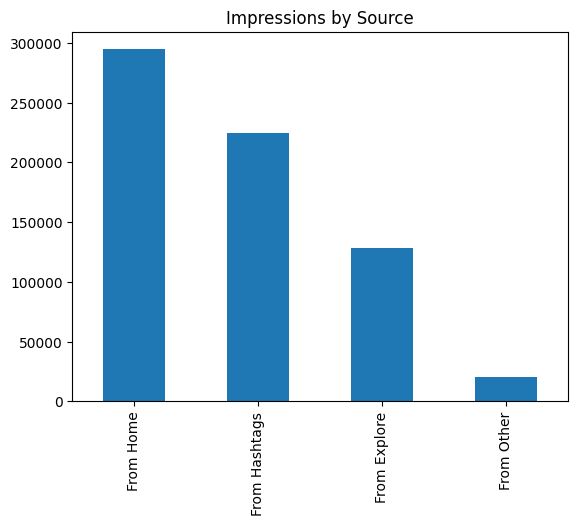

In [5]:
reach_cols = ["From Home", "From Hashtags", "From Explore", "From Other"]
df[reach_cols].sum().plot(kind="bar", title="Impressions by Source")
plt.show()


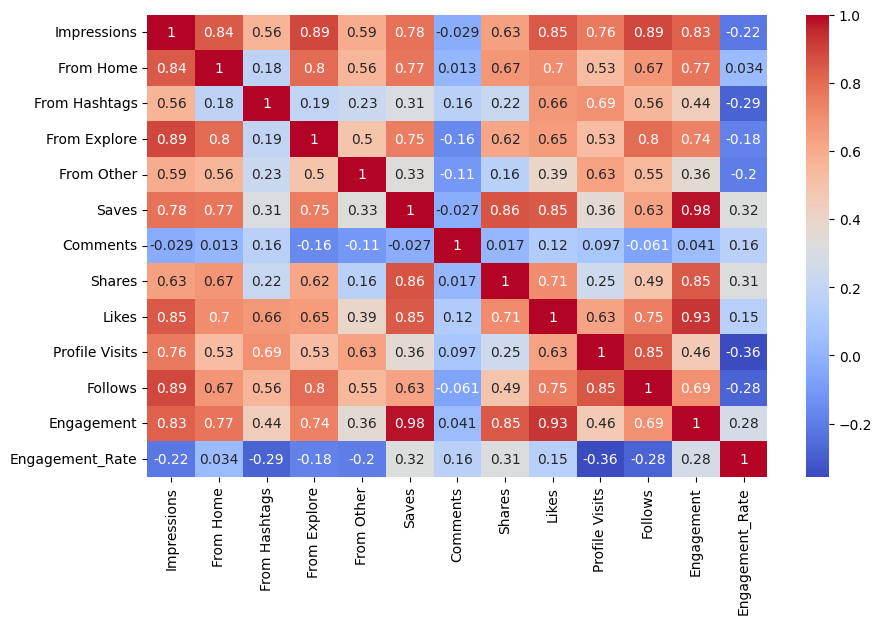

In [6]:
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [7]:
df.sort_values("Engagement_Rate", ascending=False).head()


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Engagement,Engagement_Rate
99,5409,2643,2006,1068,230,393,10,27,275,38,14,Here is a complete roadmap to data science tha...,#data #datascience #dataanalysis #dataanalytic...,705,0.130338
45,4298,3050,969,181,64,263,6,19,225,21,4,Here are some of the best Python project ideas...,#python #pythonprogramming #pythonprojects #py...,513,0.119358
81,5273,2673,2003,433,114,318,9,22,250,25,10,Here is a complete roadmap to data science tha...,#data #datascience #dataanalysis #dataanalytic...,599,0.113598
108,6814,2816,2769,900,128,469,8,22,249,24,16,Here are some of the best websites that you ca...,#datascience #datasciencejobs #datasciencetrai...,748,0.109774
90,10386,4137,3551,2355,205,668,8,41,328,42,38,Here are some of the best websites that you ca...,#data #datascience #dataanalysis #dataanalytic...,1045,0.100616


## Conclusion

This analysis shows that Instagram post performance is driven more by
engagement quality than by impressions alone. Posts appearing in the
home feed generate the highest reach, while saves and comments play a
strong role in converting reach into profile visits and follows.

The engagement rate provides a clearer measure of post effectiveness
compared to raw impressions. Content that encourages interaction tends
to perform better in terms of audience growth.

Overall, focusing on valuable, save-worthy content and consistent
engagement can significantly improve Instagram performance.
